# <center>作业三：数据爬取与分析</center>
<center>2025年3月19日
**2023200660**</center>


#### 西二旗数据爬取与分析


### 3-1,2: Data Mining
- Housing Price Data from https://esf.fang.com/
- Housing Rent Data from https://zu.fang.com/
- Data needed: listed below

| Data | Description |
| --- | --- |
| Block | Block Name |
| Price | Housing Price |
| Rent | Housing Rent |
| Area | Housing Area |
| Layout | Housing Layout |
| Floor | Housing Floor |
| Year | Housing Year |
| Direction | Housing Direction |
| Community | Housing Community |
| District | Housing District |
|---> | Housing URL |

### 网页原代码如下:


<dd><h4 class="clearfix"><a ps="1_2_60" href="/chushou/3_483820454.htm" target="_blank" data_channel="2,2" title="优选 966万 领秀硅谷 西二旗 158平 南北三居 低价房"><span class="tit_shop"> 优选 966万 领秀硅谷 西二旗 158平 南北三居 低价房</span></a></h4><p class="tel_shop"> 3室2厅 <i>|</i> 158.23㎡ <i>|</i> 底层 （共5层） <i>|</i> 南北向 <i>|</i> 2003年建 <i>|</i><span class="people_name"><a nofollow="" href="/agentshop/19907671.html" title="访问[安兰春]的个人网上店铺，查看更多房源" target="_blank">安兰春</a></span></p><p class="add_shop"><a target="_blank" href="/house-xm1010625783/" title="领秀硅谷"> 领秀硅谷 </a><span>西二旗-西二旗中路六号</span></p><p class="clearfix label"><a href="//baike.fang.com/item/满五/2098659" target="_blank">满五</a><a href="//baike.fang.com/item/业主急售/12851714" target="_blank">业主急售</a><a href="//baike.fang.com/item/性价比高/12851715" target="_blank">性价比高</a><a href="//baike.fang.com/item/首付低/12851716" target="_blank">首付低</a><a href="//baike.fang.com/item/配套成熟/12851723" target="_blank">配套成熟</a></p></dd>

In [1]:
!pip install selenium requests

  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.1 MB/s eta 0:00:0000:0100:01
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)


In [8]:
!pip install webdriver_manager

  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl (27 kB)


In [1]:
import csv
import time
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

CHROMEDRIVER_PATH = "\mnt\c\Program Files\Google\Chrome\Application\chromedriver.exe" 
service = Service(CHROMEDRIVER_PATH)

options = webdriver.ChromeOptions()
options=webdriver.ChromeOptions()

options.add_argument('--ignore-ssl-errors')
options.add_argument('--headless')  # debug完成,故为了节约时间采用无头模式
options.add_argument('--ignore-certificate-errors') # 忽略证书错误
options.add_experimental_option('excludeSwitches', ['enable-automation'])# 忽略 Bluetooth: bluetooth_adapter_winrt.cc:1075 Getting Default Adapter failed. 错误
options.add_experimental_option('excludeSwitches', ['enable-logging'])# 忽略 DevTools listening on ws://127.0.0.1... 提示

In [16]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

target_url1 = "https://esf.fang.com/house-a015277-b07195/"
driver.get(target_url1)
# 创建CSV文件并写入表头
with open('xierqi.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['id','title','tag','loc','price','unit_price','clearfix_label'])
    
    house_id = 1  # 房源ID计数器
    for page in tqdm.tqdm(range(10)):   # 处理10页数据
        # 等待页面加载完成
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.shop_list')))
        
        # 获取所有房源容器
        house_list = driver.find_elements(By.CSS_SELECTOR, 'dl[dataflag]')
        
        for house in house_list:
            try:# 提取标题
                title = house.find_element(By.CSS_SELECTOR, 'h4 a').get_attribute('title')               
                
                try:    # 提取房屋信息
                    tel_shop = house.find_element(By.CLASS_NAME, 'tel_shop').text
                    tag = tel_shop.replace(' | ', ', ')
                except NoSuchElementException:tag = 'nan'
                
                # 提取位置信息
                try:loc = house.find_element(By.CSS_SELECTOR, '.add_shop a').get_attribute('title')
                except NoSuchElementException:loc = 'nan'
                
                try:    # 提取价格信息
                    price = house.find_element(By.CLASS_NAME, 'price_right').text.split('\n')[0]
                    unit_price = house.find_element(By.CLASS_NAME, 'price_right').text.split('\n')[1]
                except:price = 'nan';unit_price = 'nan'
                
                try:    # 提取标签
                    labels = house.find_elements(By.CSS_SELECTOR, '.label a')
                    clearfix_label = ' '.join([label.text for label in labels])
                except:clearfix_label = 'nan'
                
                # 写入数据
                writer.writerow([
                    house_id,
                    title,
                    tag,
                    loc,
                    price,
                    unit_price,
                    clearfix_label
                ])
                house_id += 1
                
            except Exception as e:
                print(f"处理房源时发生错误：{str(e)}")
                continue
        # 翻页处理
        if page < 9:  # 只需要翻9次页即可获取10页数据
            try:
                next_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[contains(text(),"下一页")]')))
                driver.execute_script("arguments[0].click();", next_btn)
                time.sleep(2)
                print(f"- 已翻至第{page+2}页")
            except Exception as e:
                print("- 翻页失败/已是最后一页")
                break

driver.quit()
print("数据爬取完成！")

 10%|█         | 1/10 [00:08<01:13,  8.20s/it]

- 已翻至第2页


 20%|██        | 2/10 [00:16<01:06,  8.27s/it]

- 已翻至第3页


 30%|███       | 3/10 [00:24<00:55,  7.96s/it]

- 已翻至第4页


 40%|████      | 4/10 [00:32<00:47,  7.98s/it]

- 已翻至第5页


 50%|█████     | 5/10 [00:39<00:39,  7.89s/it]

- 已翻至第6页


 60%|██████    | 6/10 [00:47<00:31,  7.91s/it]

- 已翻至第7页


 70%|███████   | 7/10 [00:55<00:23,  7.89s/it]

- 已翻至第8页


 80%|████████  | 8/10 [01:03<00:15,  7.97s/it]

- 已翻至第9页


 80%|████████  | 8/10 [01:18<00:19,  9.82s/it]

- 翻页失败/已是最后一页
数据爬取完成！


### 接下来爬取租房的数据

<dd class="info rel"><p class="title" id="rentid_D09_2_02"><a href="/chuzu/3_483866268_1.htm" data_channel="2,8" source_page="1" target="_blank" title="一号线九棵树 两家合租 南向主卧阳台 可月付 家电齐全无杂费">一号线九棵树 两家合租 南向主卧阳台 可月付 家电齐</a></p><p class="font15 mt12 bold"> 合租主卧<span class="splitline">|</span>2户合租<span class="splitline">|</span>21㎡<span class="splitline">|</span>朝南 </p><p class="gray6 mt12" id="rentid_D09_2_06"><a href="//zu.fang.com/house-a010/" target="_blank"><span>通州</span></a>-<a href="//zu.fang.com/house-a010-b01174/" target="_blank"><span>梨园</span></a>-<a href="//zu.fang.com/house-xm1010499747/" target="_blank"><span>葛布店东里</span></a></p><div id="rentid_D09_2_07"><p class="mt12"><span class="note subInfor">距1号线(八通线)梨园站约749米。</span></p></div><p class="gray6 mt15" style="line-height: 16px;"></p><p class="mt12"><span class="note colorGreen"><a href="https://baike.fang.com/item/%E5%85%A8%E8%A3%85%E5%85%A8%E9%85%8D/12851762" class="link_rk" target="_blank">全装全配</a></span><span class="note colorRed"><a href="https://baike.fang.com/item/%E9%87%87%E5%85%89%E5%A5%BD/12851718" class="link_rk" target="_blank">采光好</a></span><span class="note colorBlue"><a href="https://baike.fang.com/item/%E5%91%A8%E8%BE%B9%E9%85%8D%E5%A5%97%E9%BD%90/12851760" class="link_rk" target="_blank">周边配套齐</a></span></p><div class="moreInfo"><p class="mt5 alingC"><span class="price">1698</span>元/月</p></div><div style="display: none;" class="notice" id="rentid_D09_2_04"><a class="gray6 duibi">对比</a></div></dd>

In [3]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

target_url2 = "https://zu.fang.com/house-a015277-b07195/"
driver.get(target_url2)
headers = ['id', 'title', 'rental_type', 'area', 'orientation', 
          'district', 'location', 'subway_info', 'price', 'tags']

# 创建CSV文件并写入新表头
with open('西二旗租房.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    
    house_id = 1  # 房源ID计数器
    # 处理5页数据
    for page in tqdm.tqdm(range(5)):
        # 等待页面加载完成
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '.houseList')))
        
        # 获取所有房源容器
        house_list = driver.find_elements(By.CSS_SELECTOR, 'dd.info.rel')
        
        for house in house_list:
            try:# 提取标题
                title = house.find_element(By.CSS_SELECTOR, 'p.title a').get_attribute('title').strip()
                             
                try:    # 提取房屋类型信息
                    type_info = house.find_element(By.CSS_SELECTOR, 'p.font15.bold').text
                    parts = [p.strip() for p in type_info.split('|')]
                    rental_type = parts[0] if len(parts)>0 else 'nan'
                    area = parts[2].replace('㎡','') if len(parts)>2 else 'nan'  # 提取21㎡中的数字
                    orientation = parts[3] if len(parts)>3 else 'nan'
                except NoSuchElementException:rental_type = area = orientation = 'nan'
                                
                try:    # 提取位置信息
                    loc_elements = house.find_elements(By.CSS_SELECTOR, 'p.gray6.mt12 a')
                    district = '-'.join([e.text for e in loc_elements[:1]])  # 行政区
                    location = '-'.join([e.text for e in loc_elements[1:]])  # 具体位置
                except:district = location = 'nan'
                
                # 提取地铁信息
                try:subway_info = house.find_element(By.CSS_SELECTOR, 'span.subInfor').text
                except:subway_info = 'nan'
                
                # 提取价格
                try:price = house.find_element(By.CSS_SELECTOR, 'div.moreInfo span.price').text + '元/月'
                except:price = 'nan'
                
                # 提取标签
                try:tags = ' '.join([tag.text for tag in house.find_elements(By.CSS_SELECTOR, 'span.note a')])
                except:tags = 'nan'
                
                # 写入数据
                writer.writerow([
                    house_id,
                    title,
                    rental_type,
                    area,
                    orientation,
                    district,
                    location,
                    subway_info,
                    price,
                    tags
                ])
                
                house_id += 1      
            except Exception as e:
                print(f"处理房源时发生错误：{str(e)}")
                continue      
        # 翻页处理
        if page < 4:
            try:
                next_page = page + 2  # 第一页是1，第二页是i32，第三页i33...
                next_url = f"https://zu.fang.com/house-a015277-b07195/i3{next_page}/"
                driver.get(next_url)
                time.sleep(1)
                print(f"- 已翻至第{page+2}页")
            except Exception as e:
                print("翻页失败或已是最后一页")
                break

driver.quit()
print("租房数据爬取完成！")

 20%|██        | 1/5 [00:06<00:26,  6.64s/it]

- 已翻至第2页


 40%|████      | 2/5 [00:13<00:20,  7.00s/it]

- 已翻至第3页


 60%|██████    | 3/5 [00:21<00:14,  7.26s/it]

- 已翻至第4页


100%|██████████| 5/5 [00:25<00:00,  5.10s/it]

- 已翻至第5页
租房数据爬取完成！


## 3-3: Data Research
- Collect Data from your teammates and merge the data
(please feedback to TA if someone no response, so we can
help both team and other student)
- Data description of your data and whether data has outliers
- Then get housing price per m2 and housing rent per m2
(price/m2 and rent /m2) for each block
- Calculate median price to rent ratio for each block
- Figure A: Bar Plot the median price to rent ratio for each
block (The global fair value should around 200)

In [14]:
merge_rent_file = 'merge_rent.csv'
merge_price_file = 'merge_price.csv'
merge_rent_df = pd.read_csv('merge_rent.csv')
merge_price_df = pd.read_csv('merge_price.csv')
merge_rent_df.describe(),merge_price_df.describe()

(          merge_id    origin_id       s_rent           rent        block
 count  1448.000000  1448.000000  1448.000000    1448.000000  1448.000000
 mean    201.242403    28.825276    80.125691   14527.595304     2.361878
 std     134.542517    17.261772    74.673799   63291.675088     1.242079
 min       0.000000     0.000000     6.000000    1000.000000     1.000000
 25%      90.000000    14.000000    18.000000    2200.000000     1.000000
 50%     180.500000    29.000000    59.000000    5800.000000     2.000000
 75%     293.250000    44.000000   118.750000   11000.000000     4.000000
 max     525.000000    59.000000   346.000000  800000.000000     4.000000,
           merge_id    origin_id        s_esf    price_sum        ori_P/S  \
 count  3552.000000  3552.000000  3552.000000  3552.000000    3552.000000   
 mean    521.490991    29.328829   121.578925  1262.254082   96894.885980   
 std     358.981867    17.316572    68.446894   709.325275   27894.675199   
 min       0.000000     0

清河's rent_ratio is 202.92
西三旗's rent_ratio is 130.56
西二旗's rent_ratio is 144.36
上地's rent_ratio is 153.02


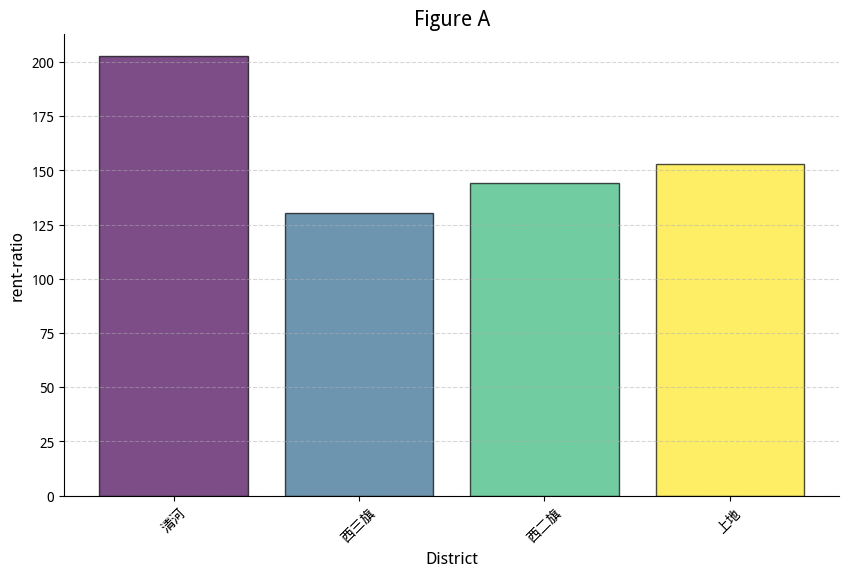

In [15]:
blocks = [1,2,3,4]
block_names = ['清河','西三旗','西二旗','上地']
rent_ratios = []
for block in blocks:
    price = 10000*merge_price_df[merge_price_df['block']==block]['price_sum'].median()
    rent = merge_rent_df[merge_rent_df['block']==block]['rent'].median()
    rent_ratio = price/(12*rent)
    print(f"{block_names[block-1]}'s rent_ratio is {rent_ratio:.2f}")
    rent_ratios.append(rent_ratio)

colors = plt.cm.viridis(np.linspace(0, 1, len(rent_ratios)))
# 绘制条形图
plt.figure(figsize=(10, 6))
for i, (ratio, color) in enumerate(zip(rent_ratios, colors)):
    plt.bar(x=block_names[i], height=ratio, color=color, alpha=0.7, edgecolor='black')

# 设置标签和标题
plt.xlabel('District', fontsize=12)
plt.ylabel('rent-ratio', fontsize=12)
plt.title('Figure A', fontsize=15)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## 3-4: Data Science
- Model 1
$price/m^2_i = \beta_0 m^2_i + \beta_2 \cdot location_i + \beta_2 m^2_i \times location_i + \epsilon_i$
- Model 2
$rent/m^2_i = \beta_0 m^2_i + \beta_2 location_i + \beta_3 m^2_i \times location_i + \epsilon_i$
- Use model 1 and model 2 to predict price and rent for the $m^2 = 50$, $m^2 = 100$
- Figure B and C: Bar Plot the price to rent ratio for each block for the $m^2 = 50$, $m^2 = 100$
- Submission: only Ipynb codes to your personal folder (NO DATA PLEASE, Git is for codes not for data)

Predicted price for 清河: [0.005 0.01 ]
Predicted price for 西三旗: [0.005 0.01 ]
Predicted price for 西二旗: [0.005 0.01 ]
Predicted price for 上地: [0.005 0.01 ]


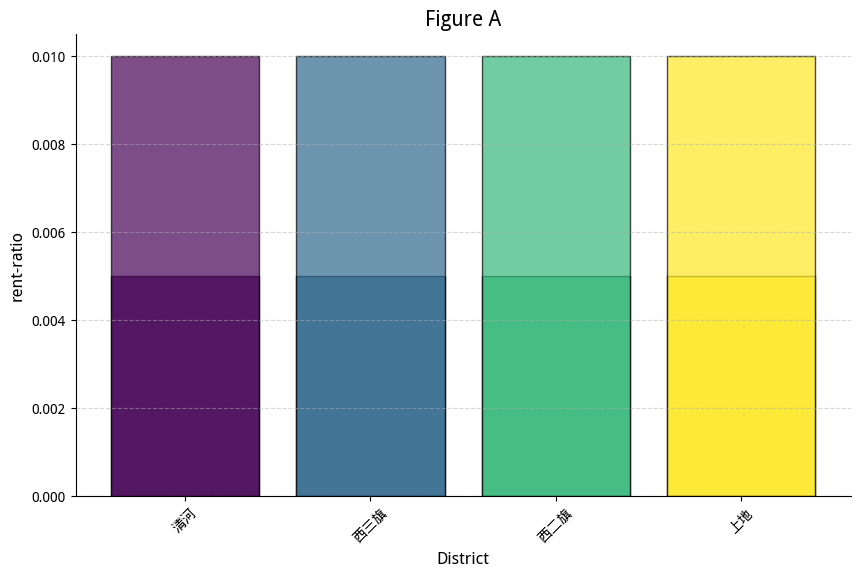

In [27]:
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()

# $price/m^2_i = \beta_0 m^2_i + \beta_2 \cdot location_i + \beta_2 m^2_i \times location_i + \epsilon_i$
y1 = merge_price_df['price_sum']/merge_price_df['ori_P/S']
merge_price_df['area'] = merge_price_df['price_sum']*10000/merge_price_df['ori_P/S']
merge_price_df['area*block'] = merge_price_df['area']*merge_price_df['block']
X1 = merge_price_df[['area', 'block','area*block']].values
linreg1.fit(X1, y1)

blocks = [1,2,3,4]
block_names = ['清河','西三旗','西二旗','上地']

# model 1 to predict price for the $m^2 = 50$, $m^2 = 100$
pred_price = []
for block in blocks:
    area = [50, 100]
    area_block = [area[0]*block, area[1]*block]
    X_test = np.array([area, [block]*2, area_block]).T
    y_pred = linreg1.predict(X_test)
    print(f"Predicted price for {block_names[block-1]}: {y_pred}")
    pred_price.append(y_pred)

colors = plt.cm.viridis(np.linspace(0, 1, len(pred_price)))
# 绘制条形图
plt.figure(figsize=(10, 6))
for i, (ratio, color) in enumerate(zip(pred_price, colors)):
    plt.bar(x=block_names[i], height=ratio, color=color, alpha=0.7, edgecolor='black')

# 设置标签和标题
plt.xlabel('District', fontsize=12)
plt.ylabel('rent-ratio', fontsize=12)
plt.title('Figure A', fontsize=15)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [26]:
linreg2 = LinearRegression()

# $rent/m^2_i = \beta_0 m^2_i + \beta_2 location_i + \beta_3 m^2_i \times location_i + \epsilon_i$
y2 = merge_rent_df['rent']/merge_rent_df['s_rent']
merge_rent_df['area*block'] = merge_rent_df['s_rent']*merge_rent_df['block']
X2 = merge_rent_df[['s_rent',  'block', 'area*block']].values
linreg2.fit(X2, y2)

LinearRegression()